In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np


In [2]:
file = "Smart_City_index_headers.csv"
data = pd.read_csv(file)
data.columns



Index(['Id', 'City', 'Country', 'Smart_Mobility', 'Smart_Environment',
       'Smart_Government', 'Smart_Economy', 'Smart_People', 'Smart_Living',
       'SmartCity_Index', 'SmartCity_Index_relative_Edmonton'],
      dtype='object')

In [3]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Selecting relevant features for clustering (excluding city names and country)
features = data[['Smart_Mobility', 'Smart_Environment', 'Smart_Government', 
               'Smart_Economy', 'Smart_People', 'Smart_Living']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Function to calculate metrics for different k values

In [4]:

def calculate_k_metrics(scaled_features, max_k=10):
    inertia = []
    silhouette_avg = []
    davies_bouldin_vals = []
    
    K = range(2, max_k + 1)
    
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_features)
        
        # Inertia (Within-cluster sum of squares)
        inertia.append(kmeans.inertia_)
        
        # Silhouette score
        silhouette_avg.append(silhouette_score(scaled_features, kmeans.labels_))
        
        # Davies-Bouldin index
        davies_bouldin_vals.append(davies_bouldin_score(scaled_features, kmeans.labels_))
    
    return K, inertia, silhouette_avg, davies_bouldin_vals

# Calculate metrics for k values

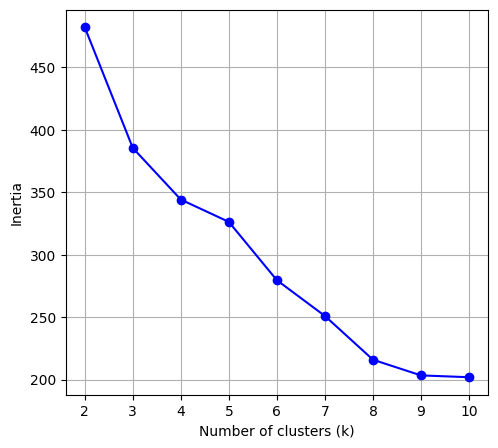

In [5]:
# Calculate metrics for k values
K, inertia, silhouette_avg, davies_bouldin_vals = calculate_k_metrics(scaled_features, max_k=10)

# Plot the Elbow Method (Inertia) and Silhouette Scores
plt.figure(figsize=(12, 5))

# Elbow method plot
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-', label='Inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
#plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.savefig(r'c:\users\enric\downloads/elbow.pdf')

# Silhouette score plot

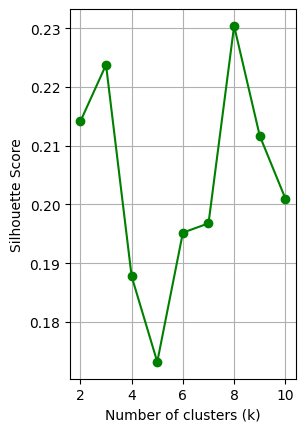

In [6]:

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_avg, 'go-', label='Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
#plt.title('Silhouette Score for Optimal k')
plt.grid(True)
plt.savefig(r'c:\users\enric\downloads/silhouette.pdf')
plt.show()

# Davies-Bouldin Index Plot

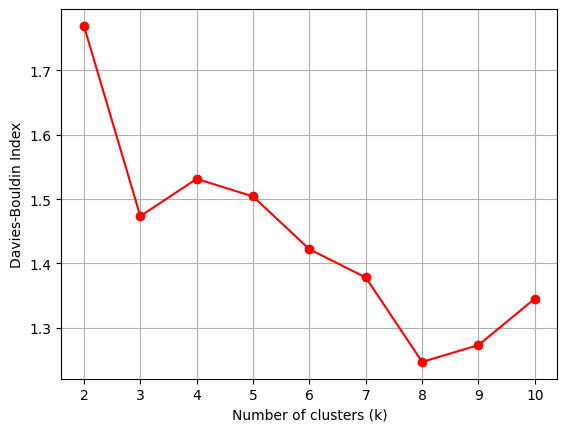

In [7]:

plt.figure()
plt.plot(K, davies_bouldin_vals, 'ro-', label='Davies-Bouldin Index')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin Index')
#plt.title('Davies-Bouldin Index for Optimal k')
plt.grid(True)
plt.savefig(r'c:\users\enric\downloads/davies-bouldin.pdf')
plt.show()

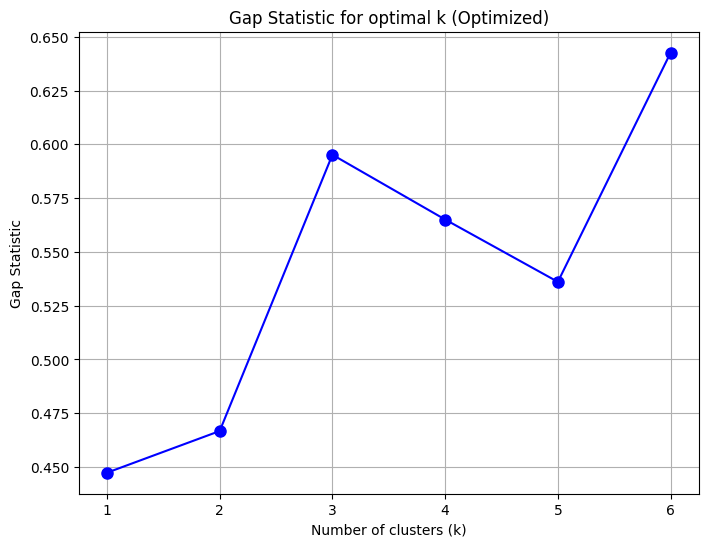

In [8]:
# Reducing the number of reference datasets and k for quicker computation
def calculate_gap_statistic_optimized(data, n_refs=5, max_k=6):
    gaps = np.zeros(max_k)
    ref_disps = np.zeros(max_k)
    disps = np.zeros(max_k)
    
    # Reference random datasets
    shape = data.shape
    for k in range(1, max_k + 1):
        # Fit k-means to the original data
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        disp = np.log(kmeans.inertia_)
        disps[k - 1] = disp

        # Generate reference datasets and calculate reference dispersion
        ref_disp = np.zeros(n_refs)
        for i in range(n_refs):
            random_reference = np.random.uniform(np.min(data, axis=0), np.max(data, axis=0), size=shape)
            km = KMeans(n_clusters=k, random_state=42)
            km.fit(random_reference)
            ref_disp[i] = np.log(km.inertia_)
        
        ref_disps[k - 1] = np.mean(ref_disp)
        gaps[k - 1] = ref_disps[k - 1] - disp
    
    return gaps, disps, ref_disps

# Calculate the Gap Statistic with reduced iterations
max_k_optimized = 6
gaps_optimized, disps_optimized, ref_disps_optimized = calculate_gap_statistic_optimized(scaled_features, max_k=max_k_optimized)

# Plotting the Gap Statistic
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_k_optimized + 1), gaps_optimized, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic for optimal k (Optimized)')
plt.grid(True)
plt.show()

# Apply K-means clustering with the best k value (k=3)

In [9]:
k_optimal = 3

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import gaussian_kde

# Apply K-means clustering with the best k value 
kmeans_optimal = KMeans(n_clusters=k_optimal, random_state=42)
data['Cluster'] = kmeans_optimal.fit_predict(scaled_features)



In [11]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)



In [12]:
# Custom Voronoi plot function to extend regions
def extended_voronoi_plot_2d(vor, **kwargs):
    fig, ax = plt.subplots(figsize=(16, 12))
    voronoi_plot_2d(vor, ax=ax, **kwargs)
    
    # Extend the Voronoi regions by adding points at infinity
    # Create a bounding box
    margin = 0.1
    x_min, x_max = data_pca[:, 0].min() - margin, data_pca[:, 0].max() + margin
    y_min, y_max = data_pca[:, 1].min() - margin, data_pca[:, 1].max() + margin
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    # Add axis labels
    ax.set_xlabel('Principal Component 1')  # Label for the x-axis
    ax.set_ylabel('Principal Component 2')  # Label for the y-axis
    
    # Plot the data points and labels
    total_points_plotted = 0
    colors = plt.cm.viridis(np.linspace(0, 1, k_optimal))
    for i, color in enumerate(colors):
        cluster_points = data_pca[clusters_kmeans == i]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, color=color)
        
        # Annotate with city names
        for j in range(cluster_points.shape[0]):
            ax.text(cluster_points[j, 0], cluster_points[j, 1], data.iloc[clusters_kmeans == i].iloc[j]['City'], fontsize=8)
        
        total_points_plotted += cluster_points.shape[0]
    
    # Marking the centroids
    ax.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], s=200, c='red', marker='x')
   #ax.set_title(f'K-Means Clustering with {k_optimal} Clusters and Extended Voronoi Diagram')
    ax.grid(True)
    
    plt.savefig('voronoi_diagram.pdf', dpi=1200)  # dpi=300 for high resolution




# Performance analysis

In [13]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Assuming `clusters_kmeans` contains the cluster labels and `scaled_features` are the scaled data
# Calculate the Silhouette Score
sil_score = silhouette_score(scaled_features, data['Cluster'])
print(f'Silhouette Score: {sil_score}')

# Calculate the Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, data['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

# Calculate the Calinski-Harabasz Index
ch_index = calinski_harabasz_score(scaled_features, data['Cluster'])
print(f'Calinski-Harabasz Index: {ch_index}')


Silhouette Score: 0.22377186191010054
Davies-Bouldin Index: 1.473504971826858
Calinski-Harabasz Index: 29.08530733703357
